# Sensitivity analysis for Bayesian networks using credal networks

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

There are several sensitivity analysis frameworks for Bayesian networks. A fairly efficient method is certainly to use credal networks to do this analysis.

## Creating a Bayesian network

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [2]:
bn=gum.fastBN("A->B->C<-D->E->F<-B")
gnb.flow.row(bn,gnb.getInference(bn))

## Building a credal network from a BN

It is easy to build a credal network from a Bayesian network by indicating the 'noise' on each parameter.

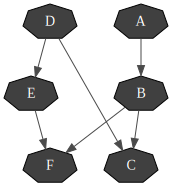

In [3]:
cr=gum.CredalNet(bn,bn)
gnb.show(cr)

In [4]:
cr.bnToCredal(beta=1e-10,oneNet=False)
cr.computeBinaryCPTMinMax()
print(cr)


A:Range([0,1])
<> : [[0.732508 , 0.267492] , [0.732505 , 0.267495]]

B:Range([0,1])
<A:0> : [[0.372087 , 0.627913] , [0.371396 , 0.628604]]
<A:1> : [[0.200061 , 0.799939] , [0.179202 , 0.820798]]

C:Range([0,1])
<B:0|D:0> : [[0.226129 , 0.773871] , [0.215414 , 0.784586]]
<B:1|D:0> : [[0.84579 , 0.15421]]
<B:0|D:1> : [[0.726674 , 0.273326] , [0.726671 , 0.273329]]
<B:1|D:1> : [[0.745767 , 0.254233] , [0.745765 , 0.254235]]

D:Range([0,1])
<> : [[0.347555 , 0.652445] , [0.346503 , 0.653497]]

E:Range([0,1])
<D:0> : [[0.918223 , 0.0817767]]
<D:1> : [[0.746899 , 0.253101] , [0.746896 , 0.253104]]

F:Range([0,1])
<E:0|B:0> : [[0.434609 , 0.565391] , [0.434362 , 0.565638]]
<E:1|B:0> : [[0.606302 , 0.393698] , [0.606283 , 0.393717]]
<E:0|B:1> : [[0.331464 , 0.668536] , [0.33007 , 0.66993]]
<E:1|B:1> : [[0.737715 , 0.262285] , [0.737712 , 0.262288]]




## Testing difference hypothesis about the global precision on the parameters

We can therefore easily conduct a sensitivity analysis based on an assumption of error on all the parameters of the network.

In [5]:
def showNoisy(bn,beta):
  cr=gum.CredalNet(bn,bn)
  cr.bnToCredal(beta=beta,oneNet=False)
  cr.computeBinaryCPTMinMax()
  ielbp=gum.CNLoopyPropagation(cr)  
  return gnb.getInference(cr,engine=ielbp)

In [6]:
for eps in [1,1e-3,1e-5,1e-8,1e-10]:
  gnb.flow.add(showNoisy(bn,eps),caption=f"noise={eps}")
gnb.flow.display()